[ 2.35179383 12.98034863]


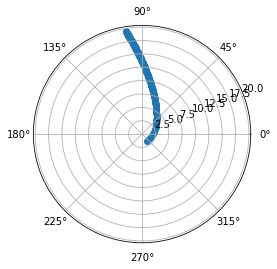

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf 

a=1 #Sun Earth distance
cometdata=np.loadtxt('CometData.csv',delimiter=',')

#earth time in years
tyears=cometdata[:,0] 

#Comet earth distance
b=cometdata[:,1] 

#Comet Sun angle
C=cometdata[:,2] 


#Sun Comet distance
c=np.sqrt(a**2+b**2-2*a*b*np.cos(abs(C))) 

#Comet Earth angle
B=np.arccos((a**2+c**2-b**2)/(2*a*c))

#Adding negative for angles west of sun
for i in range(0,len(C)):
    if C[i]<0:
        B[i]=-B[i]

#Earth polar axis angle 
EP=2*np.pi*(tyears-(tyears//1))

#Comet Polar axis angle
theta=EP-B

#Making negative angles postive by adding 2pi
for i in range(0,len(theta)):
    if theta[i]<0:
        theta[i]=2*np.pi+theta[i]

#Plotting
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(theta, c)



In [13]:
#Tof find e and r0
def rtheta (theta,e,r0):
    return r0/(1+e*np.cos(theta))

p_opt, p_cov = cf(rtheta, theta, c)
e, r0 = p_opt
print(f"The ecentricity e is {e} and semilatus rectum r0 is {r0}")


The ecentricity e is 2.351793828509747 and semilatus rectum r0 is 12.980348627159088


In [14]:
#As focus is in the origin a will be the distance of closest approach
a_dist= r0/(1-e**2)

print(f"The distance of closest approach is {abs(a_dist)}")

The distance of closest approach is 2.8648283158265135
